In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/coretech_inquiries.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.shape)


                                                text               label
0  Seeking expertise to set up a website redesign...  Project Management
1  Looking for someone to render an exterior buil...         3D Modeling
2  Please help to lead a distributed team risk re...  Project Management
3  Can you someone to develop a multi‑vendor mark...     Web Development
4  Looking for someone to maintain a CMS with pay...     Web Development
(12500, 2)


In [3]:

# quick peek
display(df.head(10))


,text,label
0,Seeking expertise to set up a website redesign...,Project Management
1,Looking for someone to render an exterior buil...,3D Modeling
2,Please help to lead a distributed team risk re...,Project Management
3,Can you someone to develop a multi‑vendor mark...,Web Development
4,Looking for someone to maintain a CMS with pay...,Web Development
5,Interested in expertise to manage a product la...,Project Management
6,Can you help to model a product prototype UV‑u...,3D Modeling
7,Interested in someone to redesign a CMS with A...,Web Development
8,Looking for expertise to audit resource alloca...,Project Management
9,We need support to render a 3D logo with PBR t...,3D Modeling


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (12500, 2)


In [5]:
#check for missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 text     0
label    0
dtype: int64


In [6]:
print("\nClass distribution:\n", df['label'].value_counts())



Class distribution:
 label
Project Management    2500
3D Modeling           2500
Web Development       2500
AI Solutions          2500
Graphic Design        2500
Name: count, dtype: int64


In [7]:
# look for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [8]:
# text length stats
df['text_len'] = df['text'].astype(str).apply(len)
print(df['text_len'].describe())

count    12500.000000
mean       119.612560
std         14.513264
min         69.000000
25%        109.000000
50%        120.000000
75%        130.000000
max        169.000000
Name: text_len, dtype: float64


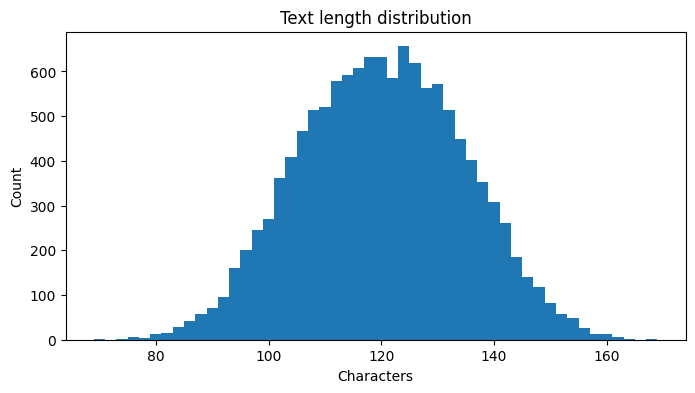

In [9]:
import matplotlib.pyplot as plt

# histogram of text length
plt.figure(figsize=(8,4))
plt.hist(df['text_len'], bins=50)
plt.title("Text length distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


In [10]:
# show some random samples per class (3 each)
for lbl in df['label'].unique():
    print("----", lbl, "----")
    display(df[df['label']==lbl]['text'].sample(3, random_state=42).tolist())

---- Project Management ----


['Seeking support to set up a distributed team Scrum ceremonies Tooling: Jira Context: for enterprise rollout Terms: hourly engagement',
 "Looking for help to set up an agile transformation communication plan (MS Project). It's for internal use, this month.",
 'RFP: support to manage an agile transformation Scrum ceremonies. Tooling: MS Project. Context: for an edtech platform. Terms: this month.']

---- 3D Modeling ----


['RFP: you to retopologize a character model 4K renders using Unreal for MVP phase, NDA required.',
 'RFP: expertise to retopologize a game asset. Must include low‑poly optimized; stack: Blender; for enterprise rollout; NDA required.',
 'I need expertise to animate a mechanical part. Must include with PBR textures; stack: 3ds Max; for a pitch deck; hourly engagement.']

---- Web Development ----


['I need you to develop a landing page with admin panel using Django for a pitch deck, under $2k.',
 'I need expertise to optimize a blog. Must include with inventory management | stack: Django | for PoC | flexible budget.',
 "Can you help to prototype a portfolio website with analytics (Angular). It's for an e‑commerce brand, remote only."]

---- AI Solutions ----


['Interested in support to deploy fraud detection with REST API. Tooling: LangChain. Context: for a healthcare app. Terms: this month.',
 'Looking for someone to integrate RAG assistant multilingual support. Preferred stack: PyTorch; for a fintech startup; under $2k.',
 'Please expertise to build a recommender system. Must include on‑prem deployment; stack: PyTorch; for a healthcare app; ASAP.']

---- Graphic Design ----


['RFP: someone to design a logo print‑ready. Preferred stack: Adobe Illustrator; for PoC; remote only.',
 'Interested in expertise to rebrand business cards. Must include in minimalist style; stack: Canva Pro; for an e‑commerce brand; flexible budget.',
 'Please you to rebrand infographics print‑ready using Adobe XD for PoC, this month.']

# Text Cleaning & Preprocessing

In [13]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(s):
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)            # remove urls
    s = re.sub(r"\S+@\S+", " ", s)                    # remove emails
    s = re.sub(r"[\u2013\u2014]", "-", s)              # normalize dashes
    s = re.sub(r"[^a-z0-9\-\s]", " ", s)              # keep alphanum, dashes, spaces
    s = re.sub(r"\s+", " ", s).strip()
    # optional stopword removal + lemmatize
    tokens = nltk.word_tokenize(s)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop and len(t)>1]
    return " ".join(tokens)

# apply (on a copy)
df['text_clean'] = df['text'].astype(str).apply(clean_text)
display(df[['text','text_clean']].head(6))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,text_clean
0,Seeking expertise to set up a website redesign...,seeking expertise set website redesign must in...
1,Looking for someone to render an exterior buil...,looking someone render exterior building photo...
2,Please help to lead a distributed team risk re...,please help lead distributed team risk registe...
3,Can you someone to develop a multi‑vendor mark...,someone develop multi vendor marketplace multi...
4,Looking for someone to maintain a CMS with pay...,looking someone maintain cm payment gateway pr...
5,Interested in expertise to manage a product la...,interested expertise manage product launch mus...


# Baseline model (TF-IDF + Logistic Regression)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.0
                    precision    recall  f1-score   support

       3D Modeling     1.0000    1.0000    1.0000       500
      AI Solutions     1.0000    1.0000    1.0000       500
    Graphic Design     1.0000    1.0000    1.0000       500
Project Management     1.0000    1.0000    1.0000       500
   Web Development     1.0000    1.0000    1.0000       500

          accuracy                         1.0000      2500
         macro avg     1.0000    1.0000    1.0000      2500
      weighted avg     1.0000    1.0000    1.0000      2500



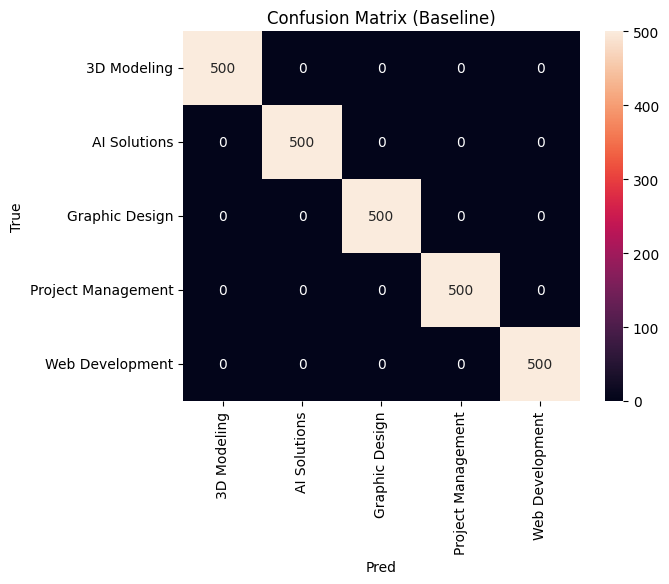

['baseline_pipeline.pkl']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns

X = df['text_clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000, min_df=5)),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs', multi_class='auto'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("Confusion Matrix (Baseline)")
plt.show()

# save baseline model (if you'd like)
joblib.dump(pipeline, "baseline_pipeline.pkl")


# Improved model (Random Forest or SVM)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000, min_df=5)),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))
joblib.dump(pipeline_rf, "rf_pipeline.pkl")


RF Accuracy: 1.0
                    precision    recall  f1-score   support

       3D Modeling     1.0000    1.0000    1.0000       500
      AI Solutions     1.0000    1.0000    1.0000       500
    Graphic Design     1.0000    1.0000    1.0000       500
Project Management     1.0000    1.0000    1.0000       500
   Web Development     1.0000    1.0000    1.0000       500

          accuracy                         1.0000      2500
         macro avg     1.0000    1.0000    1.0000      2500
      weighted avg     1.0000    1.0000    1.0000      2500



['rf_pipeline.pkl']

In [17]:
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])
print("Example prediction check:")
print(X_test.iloc[0])
print("Predicted:", pipeline_rf.predict([X_test.iloc[0]])[0])


Train size: 10000 Test size: 2500
Example prediction check:
need coordinate pmo budget tracking using trello internal use 2k
Predicted: Project Management


In [18]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = pipeline_rf.named_steps['tfidf']
feature_names = tfidf.get_feature_names_out()
clf = pipeline_rf.named_steps['clf']

for i, label in enumerate(clf.classes_):
    top10 = np.argsort(clf.feature_importances_)[::-1][:10]
    print(label, [feature_names[j] for j in top10])


3D Modeling ['adobe', 'render', 'photoshop', 'figma', 'plan', 'project', 'jira', '3d', 'texture', 'model']
AI Solutions ['adobe', 'render', 'photoshop', 'figma', 'plan', 'project', 'jira', '3d', 'texture', 'model']
Graphic Design ['adobe', 'render', 'photoshop', 'figma', 'plan', 'project', 'jira', '3d', 'texture', 'model']
Project Management ['adobe', 'render', 'photoshop', 'figma', 'plan', 'project', 'jira', '3d', 'texture', 'model']
Web Development ['adobe', 'render', 'photoshop', 'figma', 'plan', 'project', 'jira', '3d', 'texture', 'model']


In [19]:
log_reg = pipeline.named_steps['clf']  # Assuming your Logistic Regression pipeline
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

for i, label in enumerate(log_reg.classes_):
    top10 = np.argsort(log_reg.coef_[i])[-10:]
    print(f"\nClass: {label}")
    print([feature_names[j] for j in top10])



Class: 3D Modeling
['unity', 'retopologize', 'animate', 'blender', 'maya', 'asset', 'model', 'texture', '3d', 'render']

Class: AI Solutions
['develop', 'langchain', 'chatbot', 'pytorch', 'python', 'analytics dashboard', 'api', 'evaluate', 'integrate', 'deploy']

Class: Graphic Design
['canva', 'canva pro', 'pro', 'rebrand', 'layout', 'illustrate', 'refresh', 'adobe', 'figma', 'photoshop']

Class: Project Management
['coordinate', 'roadmap', 'manage', 'asana', 'trello', 'clickup', 'notion', 'project', 'jira', 'plan']

Class: Web Development
['api integration', 'flask', 'cm', 'fastapi', 'laravel', 'blog', 'django', 'angular', 'site', 'booking']


In [20]:
# Example user input
user_input = "Need a 3D animation for a product prototype using Blender."
pred_label = pipeline.predict([user_input])[0]
pred_proba = pipeline.predict_proba([user_input])[0]
confidence = round(pred_proba.max() * 100, 2)

print(f"Input: {user_input}")
print(f"Predicted Category: {pred_label}")
print(f"Confidence: {confidence}%")


Input: Need a 3D animation for a product prototype using Blender.
Predicted Category: 3D Modeling
Confidence: 97.0%


In [21]:
while True:
    text = input("Enter a client inquiry (or type 'exit' to stop): ")
    if text.lower() == 'exit':
        break
    pred = pipeline.predict([text])[0]
    conf = round(pipeline.predict_proba([text])[0].max() * 100, 2)
    print(f"Predicted: {pred} | Confidence: {conf}%\n")


Enter a client inquiry (or type 'exit' to stop): Need machine learning engineer to solve complex AI projects
Predicted: AI Solutions | Confidence: 63.9%

Enter a client inquiry (or type 'exit' to stop): exit


In [22]:
print(type(model))


NameError: name 'model' is not defined

In [23]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, "service_classifier.pkl")
print("✅ Model saved as service_classifier.pkl")


✅ Model saved as service_classifier.pkl


In [24]:
# Load model
loaded_model = joblib.load("service_classifier.pkl")

# Test prediction
print(loaded_model.predict(["Need a logo design for my brand"]))


['Graphic Design']


In [25]:
import joblib

# Save the pipeline (which includes TF-IDF + Logistic Regression)
joblib.dump(pipeline, 'job_classification_model.pkl')


['job_classification_model.pkl']

In [26]:
from google.colab import files
files.download('job_classification_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import joblib

# Load the model from the saved file
model = joblib.load('job_classification_model.pkl')

print(type(model))


<class 'sklearn.pipeline.Pipeline'>


In [29]:
import pickle

# Example of saving
with open('job_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [27]:
print(type(model))


NameError: name 'model' is not defined

In [30]:
!ls -lh job_classification_model.pkl


-rw-r--r-- 1 root root 240K Aug 31 06:14 job_classification_model.pkl


In [31]:
import joblib

# Assuming your pipeline model is called 'model'
joblib.dump(model, 'job_classification_model.pkl')


['job_classification_model.pkl']

In [32]:
from google.colab import files
files.download('job_classification_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import joblib

model = joblib.load("job_classification_model.pkl")
print(model)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, min_df=5,
                                 ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    multi_class='auto'))])


In [34]:
print(hasattr(model.named_steps['tfidf'], 'idf_'))


True


In [35]:
model.fit(X_train, y_train)
joblib.dump(model, "job_classification_model.pkl")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


['job_classification_model.pkl']